In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.7/ (Recommended version – 3.7).
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html

# Load Module ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.10.12
numpy version: 1.26.4
pandas version:  2.2.2
seaborn version: 0.13.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# [Understanding SVM Kernels](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html) on [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)


### About [Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)


This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

load dataset - [sklearn.datasets.load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

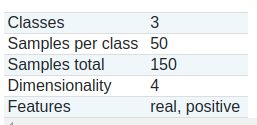

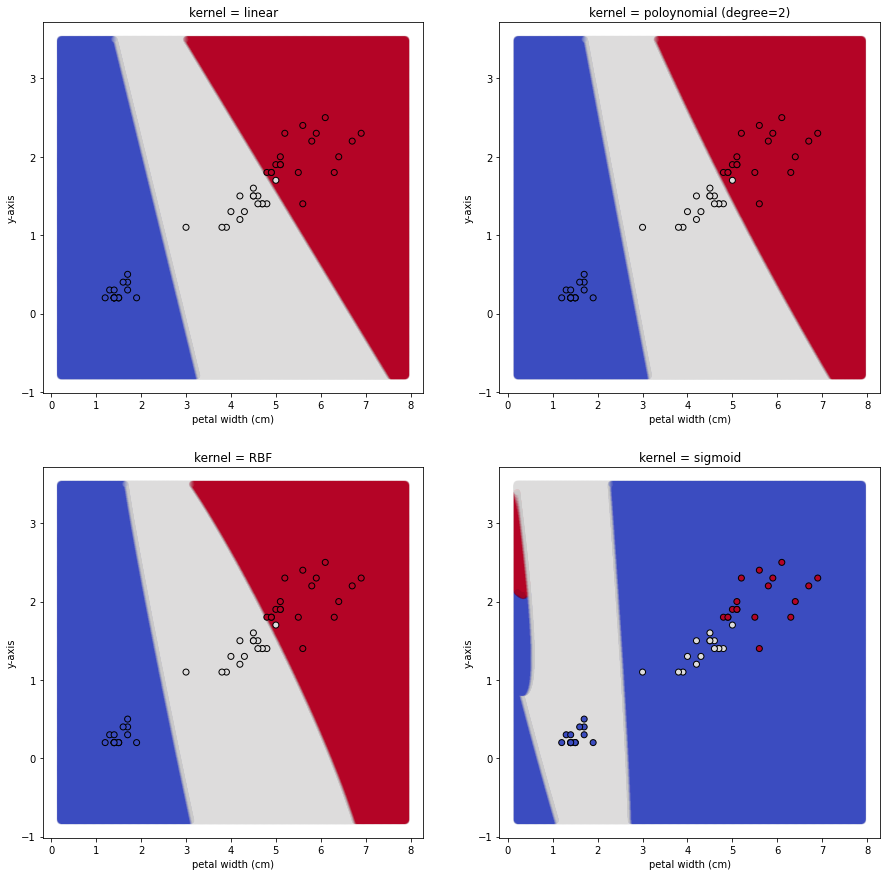

### [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

[Kernel functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)

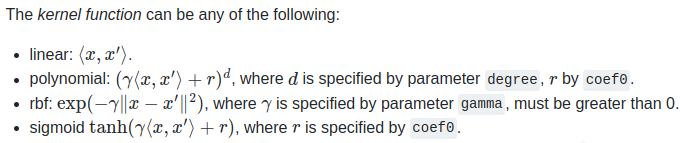

#### load iris dataset

In [2]:
from sklearn.datasets import load_iris                                          # load dataset method

iris_dataset=load_iris()                                                        # make load dataset (as bunch)
print(iris_dataset.DESCR)                                                       # see info of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

#### convert dataset in pandas dataframe

In [3]:
iris_df=pd.DataFrame(data=iris_dataset.data,columns=iris_dataset.feature_names) # make data frame from iris data
iris_df['target']=iris_dataset.target                                           # add target column
iris_df.head()                                                                  # see head of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### select features for plot

Only two (for x-axis and y-axis) out of four - higly correlated features

In [4]:
iris_df.corr()                                                                  # compute pairwise correlation of columns

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [5]:
selected_columns=iris_df.corr()['target'].iloc[:-1].abs().sort_values(ascending=False)[:2].index.to_list()# select two most highly correlated features
print('Selected features:',selected_columns)                                    # make print selected features

Selected features: ['petal width (cm)', 'petal length (cm)']


#### make plot

In [6]:
from sklearn.model_selection import train_test_split                            # load train and test split method

Xtrain,Xtest,ytrain,ytest=train_test_split(iris_df.drop(columns=['target']),iris_df['target'],test_size=0.33)# make split data with 33% test size
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape                               # see shape of inputs and outputs

((100, 4), (100,), (50, 4), (50,))

In [7]:
# Make grid for plot
x_minimum=iris_df[selected_columns[0]].min()-1.0                                # get x-axis minimum value (with offset of 1)
x_maximum=iris_df[selected_columns[0]].max()+1.0                                # get x-axis maximum value (with offset of 1)
y_minimum=iris_df[selected_columns[1]].min()-1.0                                # get y-axis minimum value (with offset of 1)
y_maximum=iris_df[selected_columns[1]].max()+1.0                                # get y-axis maximum value (with offset of 1)

# Note: Increasing the number of points while forming the grid increases computation and time complexity. For example, using 1000 points might take a
#   few minutes to plot the figure. For the most efficient balance between view quality and computation time, use 500 points. For faster computation
#   with acceptable results, use 100 points.
xx=np.linspace(x_minimum,x_maximum,num=1000)                                    # get 1000 points between x-axis minimum and maximum range
yy=np.linspace(y_minimum,y_maximum,num=1000)                                    # get 1000 points between y-axis minimum and maximum range
xx_grid_points,yy_grid_points=np.meshgrid(xx,yy)                                # make points repeat to form grid
grid_data_points=list(zip(xx_grid_points.flatten(),yy_grid_points.flatten()))   # convert grid points into list of data points

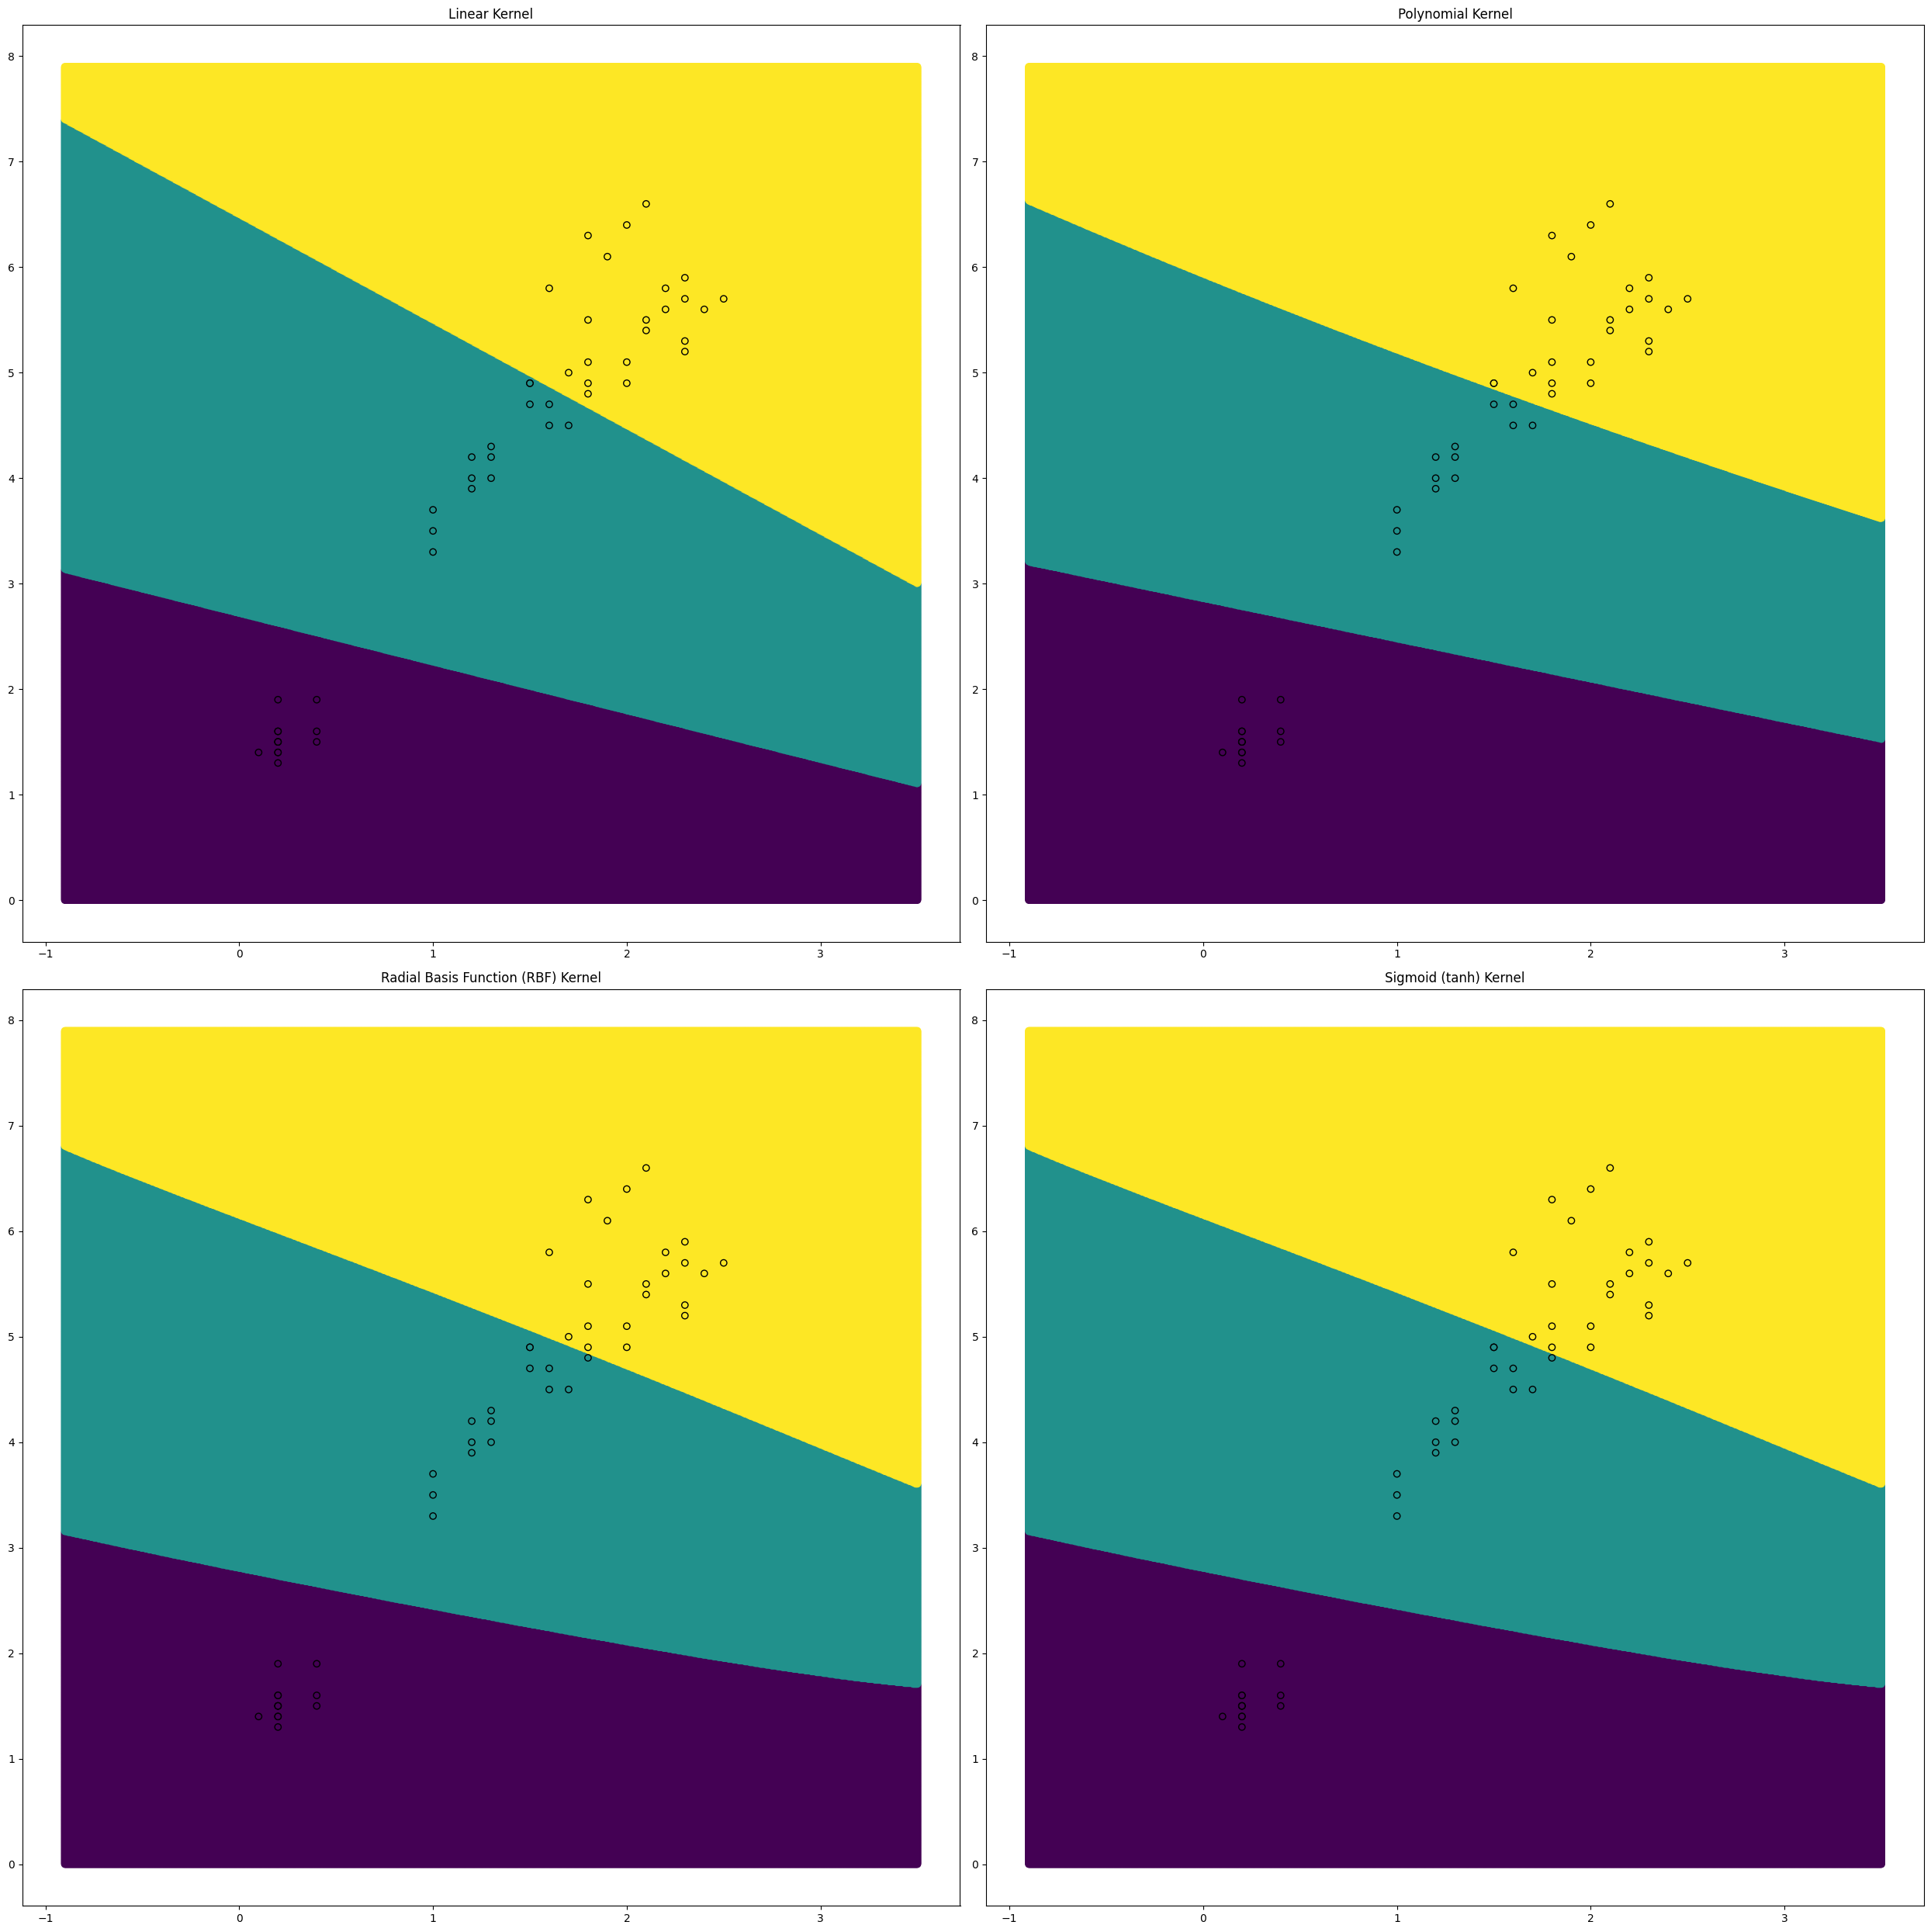

In [8]:
# Make plot figure
from sklearn.svm import SVC                                                     # load Support Vector Machine's Classifier Class
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

plt.figure(figsize=(25,25))                                                     # make figure to set figure size
# Divide plot into 4 - subplot for each of four kernels

# Make plot Linear Kernel
linerarSVC=SVC(kernel='linear').fit(Xtrain[selected_columns].values,ytrain)     # make train Support Vector Machine's Classifier on linear kernel on
#   selected features. NOTE: Make train on numpy array by `Xtrain.values` to prevent User Warning on features name seen during training but not during
#   prediction - `UserWarning: X not has feature names, but SVC was fitted with feature names ...`
plt.subplot(2,2,1)                                                              # make first plot
plt.scatter(xx_grid_points,yy_grid_points,c=linerarSVC.predict(grid_data_points))#,cmap='viridis')# make plot grid with color based on class label from
#   default color map. Choosing Colormaps in Matplotlib: https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.scatter(Xtest[selected_columns[0]],Xtest[selected_columns[1]],c=linerarSVC.predict(Xtest[selected_columns].values),ec='k')# make plot testing points.
#   NOTE: Make test on numpy array by `Xtrain.values` to prevent User Warning on features name - `UserWarning: X has feature names, but SVC was fitted
#   without feature names ...`
plt.title('Linear Kernel')                                                      # add title to plot

# Make plot Polynomial Kernel
polynomialSVC=SVC(kernel='poly').fit(Xtrain[selected_columns].values,ytrain)    # make train Support Vector Machine's Classifier on polynomial kernel on
#   selected features.
plt.subplot(2,2,2)                                                              # make second plot
plt.scatter(xx_grid_points,yy_grid_points,c=polynomialSVC.predict(grid_data_points))#,cmap='viridis')# make plot grid with color based on class label
plt.scatter(Xtest[selected_columns[0]],Xtest[selected_columns[1]],c=polynomialSVC.predict(Xtest[selected_columns].values),ec='k')# make plot testing points.
plt.title('Polynomial Kernel')                                                  # add title to plot

# Make plot Radial Basis Function (RBF) Kernel (https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)
rbfSVC=SVC(kernel='rbf').fit(Xtrain[selected_columns].values,ytrain)            # make train Support Vector Machine's Classifier on RBF kernel on
#   selected features.
plt.subplot(2,2,3)                                                              # make third plot
plt.scatter(xx_grid_points,yy_grid_points,c=rbfSVC.predict(grid_data_points))#,cmap='viridis')# make plot grid with color based on class label
plt.scatter(Xtest[selected_columns[0]],Xtest[selected_columns[1]],c=rbfSVC.predict(Xtest[selected_columns].values),ec='k')# make plot testing points.
plt.title('Radial Basis Function (RBF) Kernel')                                 # add title to plot

# Make plot Sigmoid (tanh) Kernel
sigmoidSVC=SVC(kernel='rbf').fit(Xtrain[selected_columns].values,ytrain)        # make train Support Vector Machine's Classifier on Sigmoid kernel on
#   selected features.
plt.subplot(2,2,4)                                                              # make fourth plot
plt.scatter(xx_grid_points,yy_grid_points,c=sigmoidSVC.predict(grid_data_points))#,cmap='viridis')# make plot grid with color based on class label
plt.scatter(Xtest[selected_columns[0]],Xtest[selected_columns[1]],c=sigmoidSVC.predict(Xtest[selected_columns].values),ec='k')# make plot testing points.
plt.title('Sigmoid (tanh) Kernel')                                              # add title to plot

plt.tight_layout()                                                              # adjust the padding between and around subplots
plt.show()                                                                      # make show plot - display all open figures

# Sparse Kernel Machines

### About Sparse Kernel Machines



Sparse Kernel Machines are a type of machine learning models that use kernel functions to handle complex, non-linear data, but in a way that remains relatively efficient and interpretable.

**Kernel Trick:**
- The “kernel trick” allows the model to learn complex relationships by implicitly mapping data into a higher-dimensional space—without explicitly performing heavy computations in that space.
- Common examples of kernel functions include the linear kernel, polynomial kernel, and Gaussian (RBF) kernel.

**Sparse Solution:**
- In many kernel-based models, like the **Support Vector Machine (SVM)**, only a small portion of training points (called **support vectors**) significantly influence the final decision boundary.
- This “sparsity” means the model does not need to store and use all data points during prediction, making it more efficient (faster to predict with fewer key points) and often less prone to overfitting.

**Why "Sparse"?**<br>
Most data points end up with zero weight (they don't affect the model's structure). Only a handful of important points (support vectors) are kept. This leads to smaller model size and quicker predictions.


Examples: **RVM (Relevance Vector Machine)** is example to aiming to achieve sparser solutions with a probabilistic approach.

**Benefits:**
- Efficiency: Fewer key points make computation simpler at test time.
- Generalization: The model is less likely to memorize the training data.
- Flexibility: Kernels can capture a wide range of data patterns, from simple linear to highly non-linear relationships.

### Relevance Vector Machine (RVM)


**Relevance Vector Machine (RVM)** is a sparse Bayesian approach to regression and classification. It's similar to Support Vector Machines but follows a fully probabilistic framework.

Bayesian Foundation:
- RVM assigns probability distributions to model weights.
- This probabilistic perspective naturally encourages most weights to become zero, leading to a *sparse* set of "relevance vectors."

**Advantages:**
- Often uses even fewer points than SVM.
- Provides a predictive distribution, offering uncertainty estimates on predictions.

**Considerations (drawback):** <br>
RVM training can be more complex and computationally heavier than SVMs. Because of the Bayesian nature, it may be sensitive to local optima during training.

### Support Vector Machines (SVM) vs Relevance Vector Machine (RVM)

For examples on "Relevance Vector Machine" (RVM) look - [Sparse Kernel Machines](http://theoryandpractice.org/stats-ds-book/prml_notebooks/ch07_Sparse_Kernel_Machines.html)

#### install Scikit-RVM

Source: https://github.com/JamesRitchie/scikit-rvm

In [9]:
# Source: https://github.com/JamesRitchie/scikit-rvm?tab=readme-ov-file#quickstart
!python -m pip install -qq https://github.com/JamesRitchie/scikit-rvm/archive/master.zip # make install

     - 10.8 kB 19.2 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-rvm: filename=scikit_rvm-0.1.0a1-py3-none-any.whl size=4217 sha256=4851bda79c9679dce5e283c3d791633f178bfce77e847c407b10b731e46483fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-t2o74gv7/wheels/38/97/92/d2154117423998a97dee555851d446e94a40de60cb42351729
Successfully built scikit-rvm


#### load iris dataset

In [10]:
from sklearn.datasets import load_iris                                          # load dataset method

iris_dataset=load_iris()                                                        # make load dataset (as bunch)
print(iris_dataset.DESCR)                                                       # see info of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

#### convert dataset in pandas dataframe

In [11]:
iris_df=pd.DataFrame(data=iris_dataset.data,columns=iris_dataset.feature_names) # make data frame from iris data
iris_df['target']=iris_dataset.target                                           # add target column
iris_df.head()                                                                  # see head of data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### make split data in train and test

Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
from sklearn.model_selection import train_test_split                            # load train and test split method

Xtrain,Xtest,ytrain,ytest=train_test_split(iris_df.drop(columns=['target']),iris_df['target'],test_size=0.33)# make split data with 33% test size
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape                               # see shape of inputs and outputs

((100, 4), (100,), (50, 4), (50,))

#### make models to show - Support Vector Machines (SVM) vs Relevance Vector Machine (RVM)

In [13]:
from sklearn.svm import SVC                                                     # load Support Vector Machine's Classifier Class
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from skrvm import RVC                                                           # load Relevance Vector Machine's Classifier Class
# Source: https://github.com/JamesRitchie/scikit-rvm?tab=readme-ov-file#quickstart

# Train an SVM (NOTE: multi-class is handled automatically by scikit-learn)
svmClf=SVC(kernel='rbf')                                                        # make support vector machines on default RBF kernel
%time svmClf.fit(Xtrain,ytrain)                                                 # make train model

# Train an RVM (RVC) from scikit-rvm (NOTE: By default works with binary classification. So, works as auto one-vs-one for multi-class)
rvmClf=RVC(kernel='rbf')                                                        # make relevance vector machines
%time rvmClf.fit(Xtrain,ytrain)                                                 # make train model

# make print / compare accuracy
print('Accuracy Score (SVM) (training):',svmClf.score(Xtrain,ytrain))           # make print accuracy
print('Accuracy Score (SVM) (testing) :',svmClf.score(Xtest,ytest))             # make print accuracy
print('Accuracy Score (RVM) (training):',rvmClf.score(Xtrain,ytrain))           # make print accuracy
print('Accuracy Score (RVM) (testing) :',rvmClf.score(Xtest,ytest))             # make print accuracy

CPU times: user 2.56 ms, sys: 0 ns, total: 2.56 ms
Wall time: 2.57 ms
CPU times: user 19.2 s, sys: 14 s, total: 33.1 s
Wall time: 35.5 s
Accuracy Score (SVM) (training): 0.98
Accuracy Score (SVM) (testing) : 0.96
Accuracy Score (RVM) (training): 0.99
Accuracy Score (RVM) (testing) : 0.96


In [14]:
print('Total SVM Support Vectors:',len(svmClf.support_vectors_))                # print total supporting vectors in SVM
print('SVM - Support Vectors per class (class wise) (in multi-class SVM):',dict(enumerate(svmClf.n_support_)))# print supporting vectors counts for each class
# For multi-class: RVC uses OneVsOneClassifier internally (if classes > 2) - iterate over each binary sub-classifier to see its relevance vectors.
if hasattr(rvmClf,'multi_') and hasattr(rvmClf.multi_,'estimators_'):           # using one vs all (in case of multi-class calcification)
  #print('RVC uses OneVsOne with the sub-classifiers!')                          # make print info
  print('Total RVM Support Vectors:',sum(sub_rvmClf.relevance_.shape[0] for sub_rvmClf in rvmClf.multi_.estimators_))# print total supporting vectors in RVM
  print('RVC - Support Vectors per class (class wise / sub-classifier wise):',{idx:sub_rvmClf.relevance_.shape[0] for idx,sub_rvmClf in enumerate(rvmClf.multi_.estimators_)})# make print count for each class's classifier
else:print('Relevance vectors (2-class):',rvmClf.relevance_.shape[0])           # for 2-class case (binary) - supporting vectors count

Total SVM Support Vectors: 45
SVM - Support Vectors per class (class wise) (in multi-class SVM): {0: 5, 1: 22, 2: 18}
Total RVM Support Vectors: 7
RVC - Support Vectors per class (class wise / sub-classifier wise): {0: 2, 1: 3, 2: 2}


#### make plot

In [15]:
# Only two (for x-axis and y-axis) out of four - higly correlated features
selected_columns=iris_df.corr()['target'].iloc[:-1].abs().sort_values(ascending=False)[:2].index.to_list()# select two most highly correlated features
print('Selected features:',selected_columns)                                    # make print selected features

Selected features: ['petal width (cm)', 'petal length (cm)']


In [16]:
# Make grid for plot
# Note: Increasing the number of points while forming the grid increases computation and time complexity. For example, using 1000 points might take a
#   few minutes to plot the figure. For the most efficient balance between view quality and computation time, use 500 points. For faster computation
#   with acceptable results, use 100 points.
xx_points,yy_points=np.meshgrid(                                                # make points repeat to form grid
  np.linspace(iris_df[selected_columns[0]].min()-1.0,iris_df[selected_columns[0]].max()+1.0,num=1000),# get 1000 points for x-axis
  np.linspace(iris_df[selected_columns[1]].min()-1.0,iris_df[selected_columns[1]].max()+1.0,num=1000),# get 1000 points for y-axis
  )                                                                             # grid end
grid=np.c_[xx_points.ravel(),yy_points.ravel()]                                 # convert grid points into list of data points

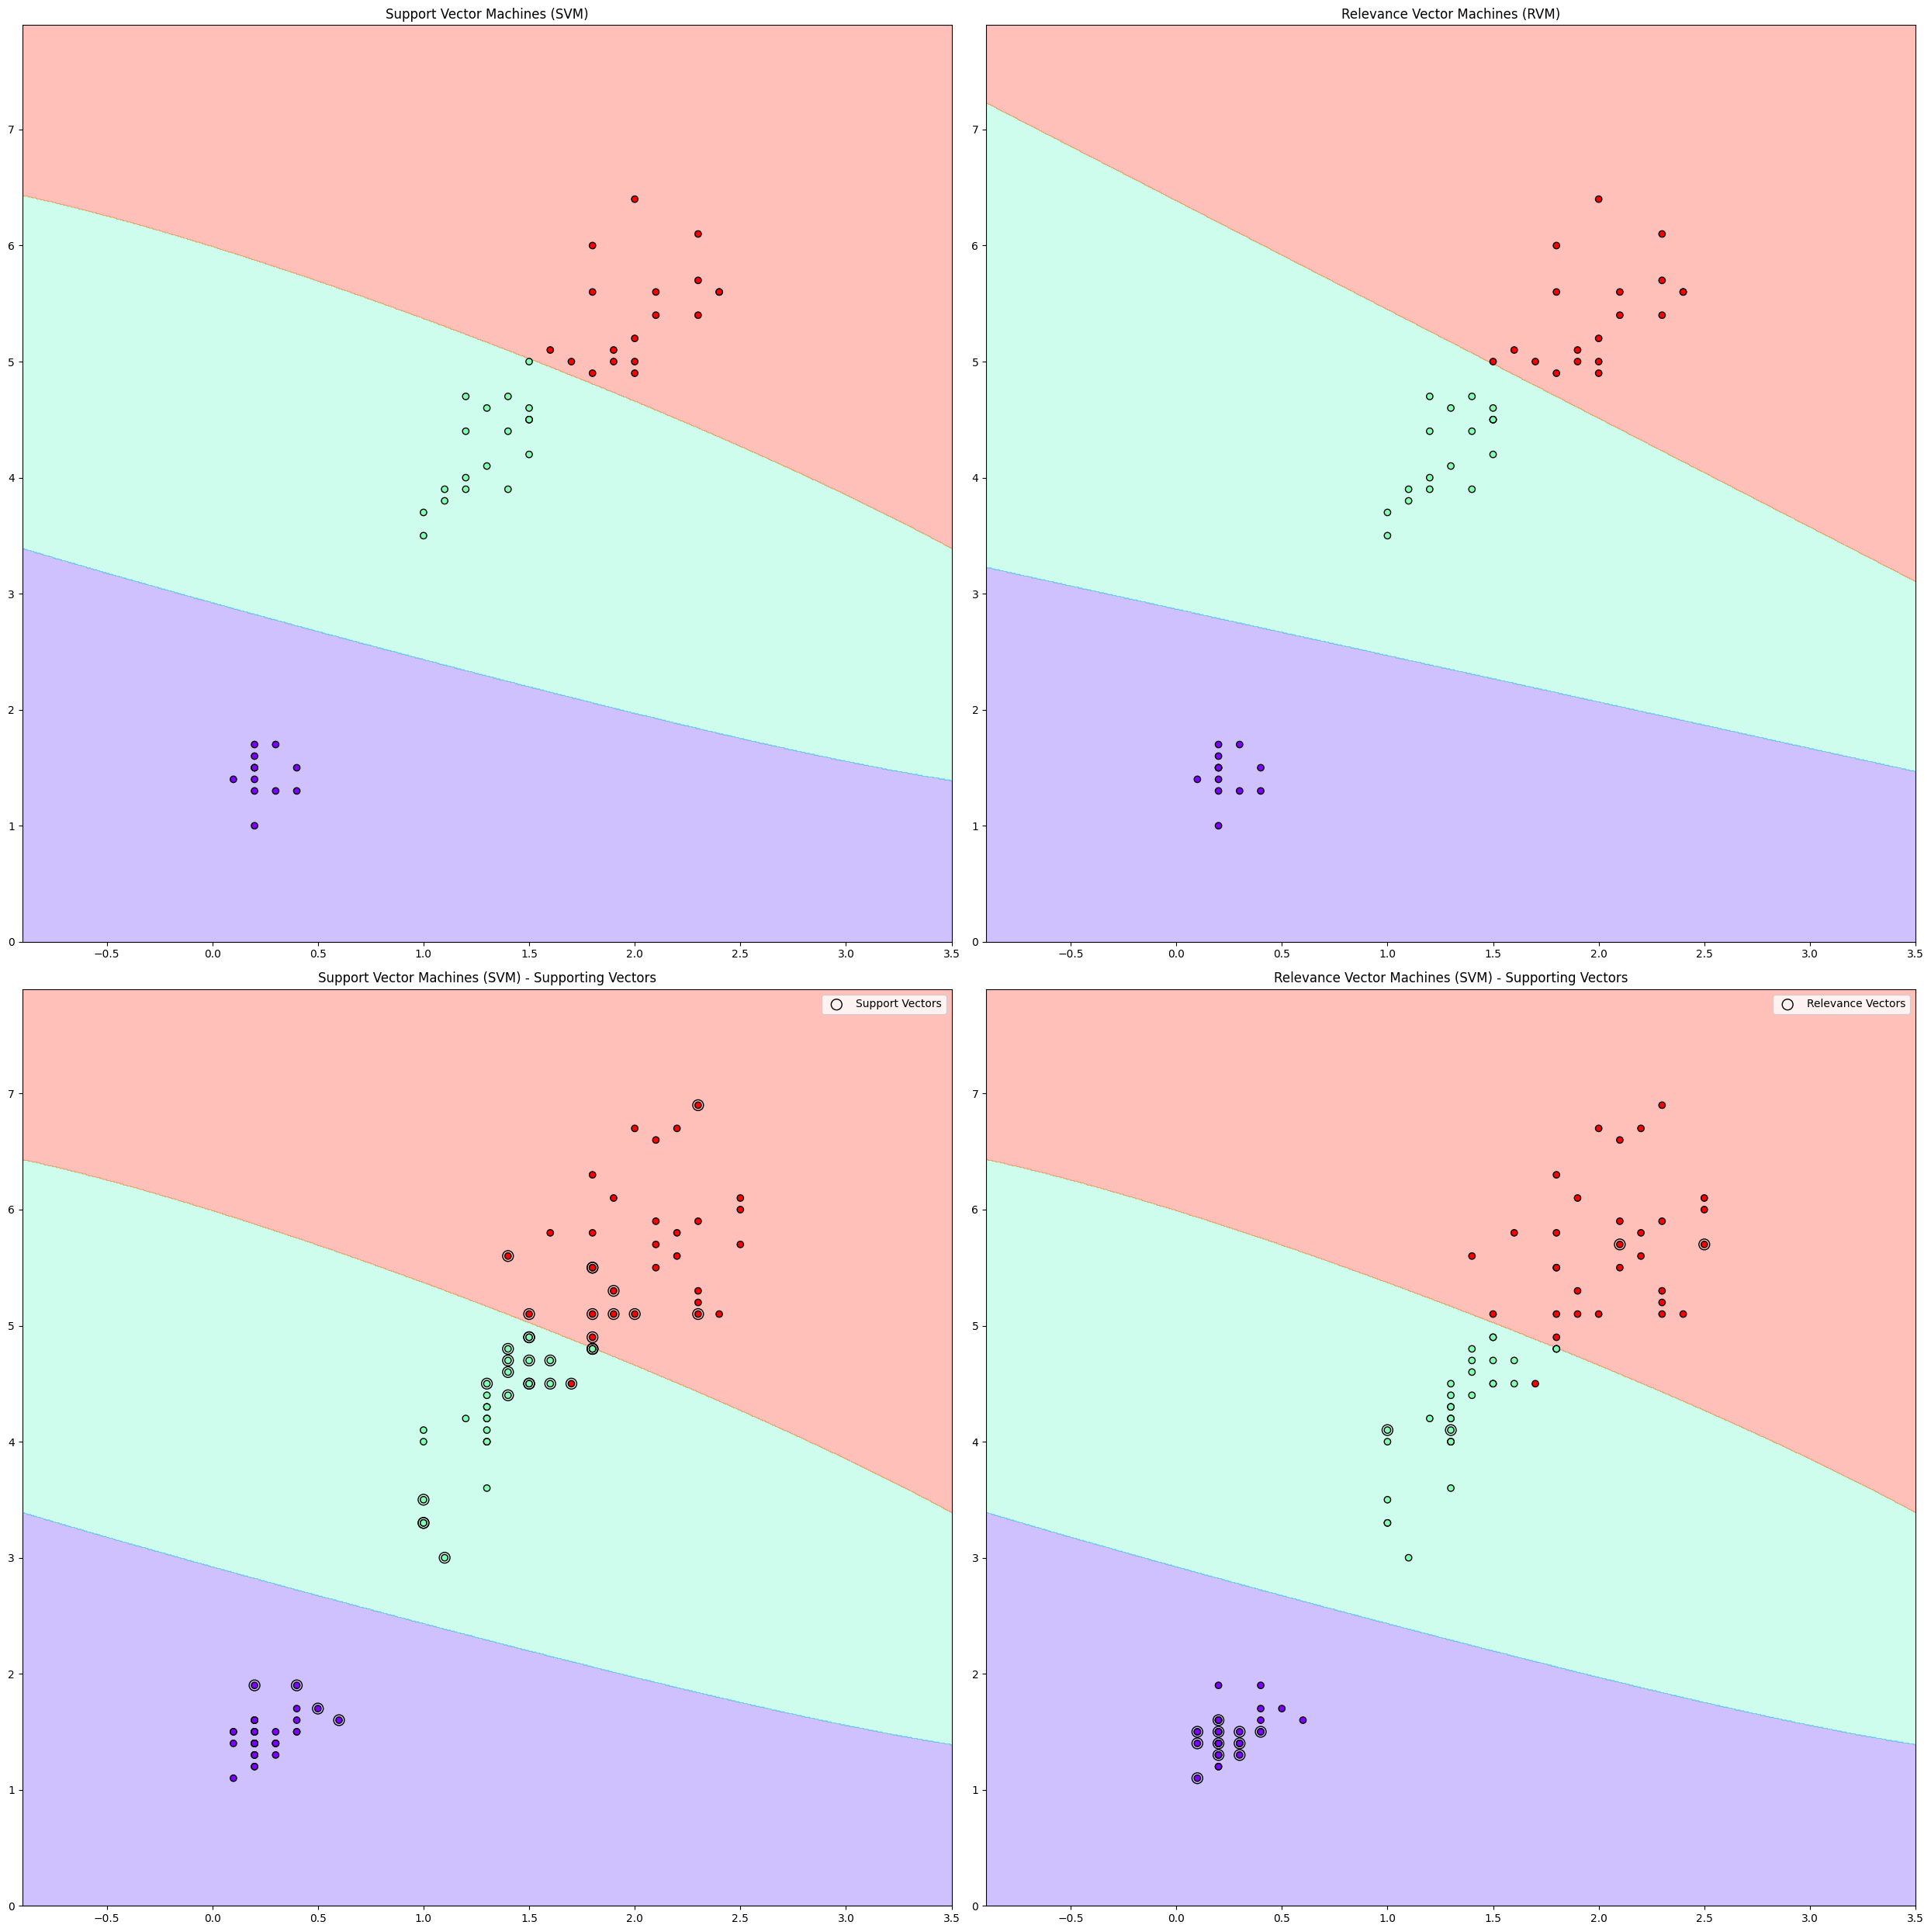

In [17]:
plt.figure(figsize=(25,25))                                                     # make figure to set figure size
# Divide plot into 2 - subplot for each SVM and RVM

# Make subplot for Support Vector Machines (SVM)
svmClf=SVC(kernel='rbf').fit(Xtrain[selected_columns].values,ytrain)            # make train Support Vector Machine's Classifier on RBF kernel on
#   selected features. NOTE: Make train on numpy array by `Xtrain.values` to prevent User Warning on features name seen during training but not during
#   prediction - `UserWarning: X not has feature names, but SVC was fitted with feature names ...`
svm_predictions=svmClf.predict(grid).reshape(xx_points.shape)                   # make prediction on grid points
plt.subplot(2,2,1)                                                              # make subplot - first
plt.contourf(xx_points,yy_points,svm_predictions,alpha=0.3,cmap='rainbow')      # make plot filled contours
plt.scatter(Xtest[selected_columns[0]],Xtest[selected_columns[1]],c=svmClf.predict(Xtest[selected_columns].values),ec='k',cmap='rainbow')# make plot
#   testing points. NOTE: Make test on numpy array by `Xtrain.values` to prevent User Warning on features name - `UserWarning: X has feature names, but
#   SVC was fitted without feature names ...`
plt.title('Support Vector Machines (SVM)')                                      # add title to plot

# Make subplot for Relevance Vector Machines (RVM)
rvmClf=RVC(kernel='rbf').fit(Xtrain[selected_columns].values,ytrain)            # make train Relevance Vector Machine's Classifier on RBF kernel
rvm_predictions=rvmClf.predict(grid).reshape(xx_points.shape)                   # make prediction on grid points
plt.subplot(2,2,2)                                                              # make subplot - second
plt.contourf(xx_points,yy_points,rvm_predictions,alpha=0.3,cmap='rainbow')      # make plot filled contours
plt.scatter(Xtest[selected_columns[0]],Xtest[selected_columns[1]],c=rvmClf.predict(Xtest[selected_columns].values),ec='k',cmap='rainbow')# make plot
#   testing points.
plt.title('Relevance Vector Machines (RVM)')                                    # add title to plot

# Make subplot for Support Vector Machines's (SVM) supporting vectors
plt.subplot(2,2,3)                                                              # make subplot - third
plt.contourf(xx_points,yy_points,svm_predictions,alpha=0.3,cmap='rainbow')      # make plot filled contours
plt.scatter(Xtrain[selected_columns[0]],Xtrain[selected_columns[1]],c=ytrain,ec='k',cmap='rainbow')# make plot training points
plt.scatter(svmClf.support_vectors_[:,0],svmClf.support_vectors_[:,1],s=100,facecolors='none',edgecolors='k',label='Support Vectors')# plot supporting vectors
plt.legend()                                                                    # add legend - to show levels
plt.title('Support Vector Machines (SVM) - Supporting Vectors')                 # add title to plot

# Make subplot for Relevance Vector Machines's (RVM) supporting vectors
if hasattr(rvmClf,'multi_') and hasattr(rvmClf.multi_,'estimators_'):           # gather RVC all relevance vectors for multi-class - using one vs all (in case of multi-class calcification)
  relevance_vectors=list(sub_rvmClf.relevance_ for sub_rvmClf in rvmClf.multi_.estimators_)# get all relevance vectors
  if relevance_vectors:relevance_vectors=np.unique(np.vstack(relevance_vectors),axis=0)# if list of relevance vectors is not empty - get only unique vectors
else:relevance_vectors=rvmClf.relevance_                                        # get for 2-class case

plt.subplot(2,2,4)                                                              # make subplot - fourth
plt.contourf(xx_points,yy_points,svm_predictions,alpha=0.3,cmap='rainbow')      # make plot filled contours
plt.scatter(Xtrain[selected_columns[0]],Xtrain[selected_columns[1]],c=ytrain,ec='k',cmap='rainbow')# make plot training points
plt.scatter(relevance_vectors[:,0],relevance_vectors[:,1],s=100,facecolors='none',edgecolors='k',label='Relevance Vectors')# plot relevance vectors
plt.legend()                                                                    # add legend - to show levels
plt.title('Relevance Vector Machines (SVM) - Supporting Vectors')               # add title to plot

plt.tight_layout()                                                              # adjust the padding between and around subplots
plt.show()                                                                      # make show plot - display all open figures

# References / Further reading

* [Official python docs](https://docs.python.org/3/)
* [Official python tutorials](https://docs.python.org/3/tutorial/index.html)
* [Python Numpy Tutorial (with Jupyter and Colab) - Stanford - Spring 2022](https://cs231n.github.io/python-numpy-tutorial/)
* [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)
* [Plot different SVM classifiers in the iris dataset](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)
* [SVM-Kernels](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)
* [sklearn - C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
* [RBF SVM parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)
* [Sparse Kernel Methods - sciencedirect](https://www.sciencedirect.com/science/article/pii/S1474667017348577)
* [Sparse Kernel Machines - SVM (Slides) (Georgia Institute of Technology)](https://faculty.cc.gatech.edu/~hic/8803-Fall-09/slides/8803-09-lec10.pdf)
* [Sparse Kernel Machines (Slides) (York University)](https://www.eecs.yorku.ca/course_archive/2010-11/F/6390D/lectures/09%20Sparse%20Kernel%20Machines.pdf)
* Example: [7. Sparse Kernel Machines — Statistics and Data Science](http://theoryandpractice.org/stats-ds-book/prml_notebooks/ch07_Sparse_Kernel_Machines.html)

# Sparse Kernel Machines (Old Notes)

**What are Kernel Machines?**<br>
Kernel machines are a type of machine learning model, like Support Vector Machines (SVMs), that can learn complex patterns in data. They use a "kernel" function to map data into a higher-dimensional space where it becomes easier to separate or model the data.

**What does Sparse Mean?**<br>
"Sparse" means using fewer things to represent the solution. In the context of machine learning, sparse models try to use only the most important data points (also called "support vectors" or "relevant vectors") to make predictions. This makes the model simpler and faster.

**Sparse Kernel Machines:** A sparse kernel machine is a kernel-based model that keeps the number of important data points small while still performing well. It simplifies the model without losing much accuracy, which is useful for making predictions faster and saving memory.

**How It Works:**
- Imagine one have a large group of dots on a graph, and want to separate them into two groups (e.g., red dots and blue dots).
- A kernel machine looks for the best way to draw a boundary between the groups.
- A sparse kernel machine identifies just a few dots that are most important for defining the boundary and ignores the rest. These key dots are enough to make accurate predictions.

**Why Use Sparse Kernel Machines?:**
- Efficiency: Fewer points mean less computation, so predictions are faster.
- Simplicity: The model is easier to understand and less prone to overfitting (when the model learns noise instead of the true pattern).

Sparse Kernel Machines are powerful for small-to-medium datasets where interpretability and sparsity are important. However, they can struggle with large datasets due to computational and memory constraints.
- **For Small-to-Medium Datasets:** Sparse kernel machines shine when datasets are small or medium-sized. This is because they can capture complex relationships in the data (thanks to the kernel trick) and maintain interpretability. The sparsity helps by reducing the number of key data points (support vectors) used, making the model less prone to overfitting.
- **For Large Datasets:** While sparse kernel machines reduce computational cost by focusing on a subset of data points, their training process can still be computationally expensive for large datasets. Kernel-based models often involve solving optimization problems that scale poorly with the dataset size, even if the model itself uses fewer support vectors.